In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  6 21:53:14 2023

@author: Donghao Li
@email: dpl5368@psu.edu
"""
# from IPython import get_ipython
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PRM_LIB import PRM
import time
%matplotlib inline

In [30]:
def Original_plot(plot):
    fig,axe = plt.subplots();
    fig.set_size_inches(12.0, 8.0)
    axe.imshow(plot[:,::-1,:].transpose((1,0,2)))
    axe.set_title('Original Map', fontsize = 'xx-large');
    axe.set_xticks([]);
    axe.set_yticks([]);
    axe.set_xlabel('X Axis',fontsize='x-large');
    axe.set_ylabel('Y Axis',fontsize='x-large');
    
def Binary_plot(im_bw):
    fig,axe = plt.subplots();
    fig.set_size_inches(12.0, 8.0)
    axe.imshow(im_bw[:,::-1].transpose(),cmap='gray')
    axe.set_title('Binary Map',fontsize='xx-large')
    axe.set_ylabel('Y Position (cm)');
    axe.set_xlabel('X Position (cm)');
    axe.set_yticks(np.arange(im_bw.shape[1],0,-int(im_bw.shape[1]/7)));
    axe.set_yticklabels(list(np.arange(0,im_bw.shape[1],int(im_bw.shape[1]/7))));
    
def Path_plot(im_bw,point,connection,path):
    fig,axe = plt.subplots();
    axe.set_title('Map with Optimized Path', fontsize='xx-large')
    fig.set_size_inches(12.0, 8.0)
    axe.imshow(im_bw[:,::-1].transpose(),cmap='gray');
    xp = np.vstack((point[connection[:,0],0],point[connection[:,1],0]))
    yp = np.vstack((im_bw.shape[1]-1-point[connection[:,0],1],im_bw.shape[1]-1-point[connection[:,1],1]))
    axe.plot(xp,yp,'-',color='#4dbeee');
    axe.plot(point[:,0],im_bw.shape[1]-1-point[:,1],'o',color='#0072BD',ms=4.0);
    axe.plot(path[:,0],im_bw.shape[1]-1-path[:,1],'-o',color='#a2142f',mec='#D95319',mfc='#D95319')
    axe.set_ylabel('Y Position (cm)');
    axe.set_xlabel('X Position (cm)');
    axe.set_yticks(np.arange(im_bw.shape[1],0,-int(im_bw.shape[1]/7)));
    axe.set_yticklabels(list(np.arange(0,im_bw.shape[1],int(im_bw.shape[1]/7))));

In [3]:
scalePixal = 100
scaleCm    = 30
Px_to_Cm   = round(scaleCm/scalePixal, ndigits=3)

img_path = 'Calmap_Window.jpg'
prm = PRM(img_path,Px_to_Cm)

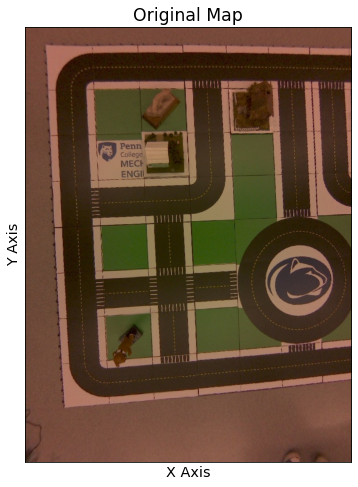

In [31]:
og_pt= prm.plot_map('Original')
Original_plot(og_pt)

In [5]:
threshold = 61.2    # thresthold for create binary grid
prm.binarymap(threshold)

# 'Original' for original figure
# 'Binary' for show Binary 

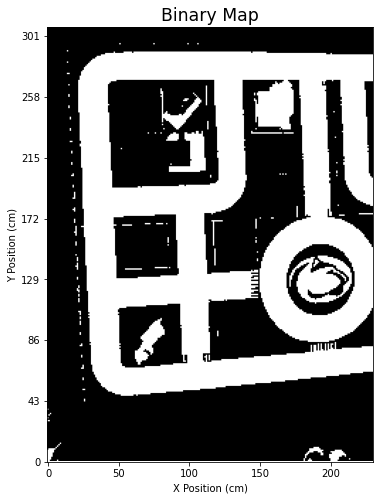

In [32]:
im_bw = prm.plot_map('Binary')
Binary_plot(im_bw)

In [7]:
currentLocation = np.array([220, 75])
Robot_heading_angle = 0
endLocation = np.array([130,280])

## convert unit
# currentLocation = currentLocation * Px_to_Cm
# endLocation = endLocation * Px_to_Cm

NumNode = 400
ConnectionDistance = 50
Connect_num = 10

In [8]:
Point,Connectivity = prm.map_gene(NumNode, ConnectionDistance, Connect_num, currentLocation, endLocation)
Path = prm.path_finding()
# the path should the nodes(meter) on the founded path
# the default path finding algorithm is Astar. If you want to switch to Dijkstra's algorithm, set astar=false.    
# Path = prm.path_finding(astar=False)

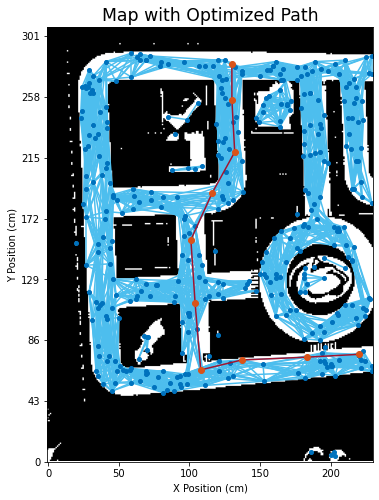

In [33]:
Path_plot(im_bw,Point,Connectivity,Path)